<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto1/AnalyzingAirbnbDataBarcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing data from Airbnb for the city of Barcelona
Nowadays, [Airbnb](https://www.airbnb.com.br/) is considered the biggest hotel company of the world, even though, actually, **it doesn't own any hotel!**  
By connecting people who want to travel (and inn) with hosts who want to rent their properties, Airbnb offers an alternative homestay service as a very innovative platform.  
By the end of 2018, this startup, founded 10 years ago, housed **more than 300 millions people** around the world, defying the traditional hotel enterprises.  
One of Airbnb's initiatives is to provide website data for some of the main cities in the world. At the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website , you can download a big amount of data for developing data science projects and solutions.

<center><img alt="Analyzing Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this notebook, we will analyze Airbnb data refering to the city of Barcelona, and see what insights can be extracted from raw data**

## About Barcelona

<center><img src="https://blog.descubraomundo.com/wp-content/uploads/2014/05/barcelona_parcguell2.jpg" alt="Barcelona, seen from one of one of its most famous tourist attractions, the Guell Park"/>
</center>

The city of Barcelona, capital of Catalonia, one of the autonomous communities of Spain, has become a major tourist destination, specially after the 1992 Summer Olympic Games. At the present moment, Barcelona has about 1.6 million inhabitants and in year 2019, it received more than 12 millions tourists (see this <a href="https://es.ara.cat/sociedad/barcelona/vuelve-barcelona-12-millones-turistas_130_4350175.html" target="_blank">link</a>, in Spanish).   
Neverthless, the large influx of tourists seemed to bother its local inhabitants who complain, mainly, about the high costs of living and city overcrowd. In response to these problems, the city's government issued a law which banned short-term private room [rentals](https://openjaw.com/newsroom/other-news/2021/09/27/barcelona-first-city-in-eu-to-ban-airbnb/), however, it allows renting of entire apartments, as long as the proprietary has a proper license.  
Now, let's check how this recent lay affect rental operations on Airbnb.

## Obtaining data
The data we will use in this notebook are obtained from web portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).  
For this analysis only a file with summary information was used.

In [1]:
#Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import summary file from Inside Airbnb web-site
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2022-09-10/visualisations/listings.csv",quotechar='"')

##Data analysis

**Dictionary data:**

**id**:  Airbnb's unique identifier for the listing  
**name**:  Name of the listing on Airbnb  
**host_id**:  integer: Airbnb'a unique identifier for host  
**host_name**:  Host name  
**neighbourhood_group**:  The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. For Barcelona it's one of its 10 districts  
**neighbourhood**:  The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.  
**latitude**:  Uses the World Geodetic System (WGS84) projection for latitude and longitude.  
**longitude**:  Uses the World Geodetic System (WGS84) projection for latitude and longitude.  
**room_type**:  It can be a entire home/apt, a private room, a shared room or even a hotel room.  
**price**:  daily price in local currency. Note, $ sign may be used despite locale  
**minimum_nights**:  minimum number of night stay for the listing (calendar rules may be different)  
**number_of_reviews**:  The number of reviews the listing has  
**last_review**:  The date of the last/newest review  
**calculated_host_listings_count**:  The number of listings the host has in the current scrape, in the city/region geography.  
**availability_365**:  avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.  
**number_of_reviews_ltm**:  The number of reviews the listing has (in the last 12 months)  
**license**:  In some cities a license is required in order to rent a room or a entire house/apt  

In [ ]:
#showing first 10 entries
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062
5,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.220630,Entire home/apt,230,5,62,2022-07-23,0.44,2,84,10,HUTB005057
6,17039441,Apart. full equipped. 2 min to Subway lines L1...,114340651,Pepa,Sants-Montjuïc,Sants - Badal,41.366400,2.116860,Entire home/apt,86,3,145,2022-09-06,2.15,1,218,34,NaN
7,197267,Cozy Studio in Gracia Neighborhood,632830,"M Angeles, Federico",Gràcia,la Vila de Gràcia,41.406610,2.151150,Entire home/apt,31,31,352,2022-09-01,2.69,4,59,6,HUTB01295238
8,553559871868002337,"8 lacus, VICTORIA",442972056,Maria,Sants-Montjuïc,Sants - Badal,41.371880,2.122200,Entire home/apt,110,2,10,2022-07-18,1.52,8,106,10,HUTB-009880
9,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,140,2,74,2022-08-10,0.54,3,287,11,HUTB-001722


## Q1. How many fields and how many entries does this dataset contain?

In [ ]:
#Identifying volume data from dataframe
print("Number of entries:\t {}".format(df.shape[0]))
print("Number of columns:\t {}".format(df.shape[1]))
# displaying column types
display(df.dtypes)

Number of entries:	 16920
Number of columnsd:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

##Q2. What is the percentage of absent data on this dataset?

In [ ]:
# sorting fields in descending order by its absent data
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           0.314894
reviews_per_month                 0.213593
last_review                       0.213593
name                              0.000591
host_name                         0.000118
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

##Q3. What is the distribution type of these fields?

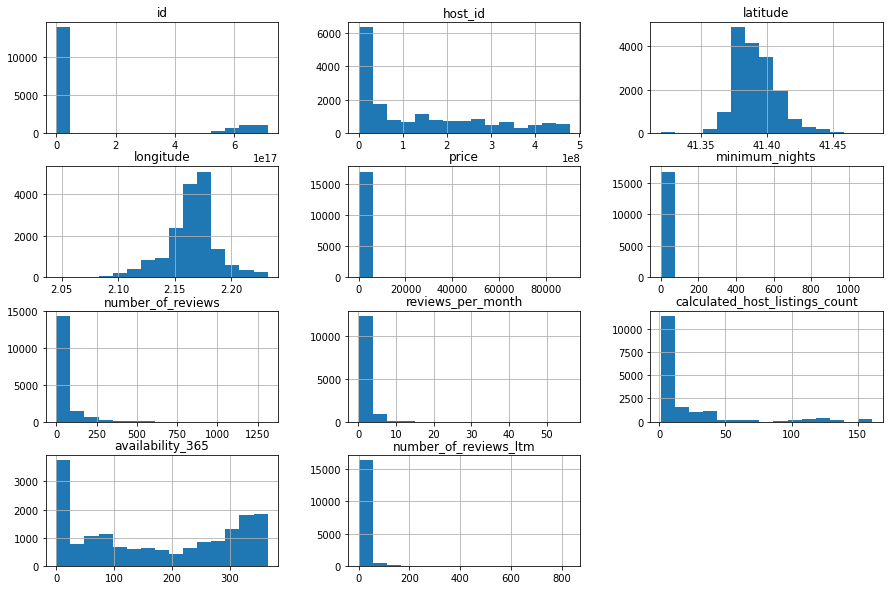

In [ ]:
#Ploting histogram of numerical fields
df.hist(bins=15,figsize=(15,10));

##Q4. How much is the average price of the rentals?

In [ ]:
#checking average price of 'price' field
print("{:.2f}".format(df.price.mean()))

172.91


#Q5. Are there outliers on this dataset?

In [ ]:
# see a statistical summary of numerical fields
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16920.000000,16920.000000,16920.000000,13306.000000,16920.000000,16920.000000
mean,172.914775,13.270449,41.029137,1.415639,19.506619,170.815012
std,927.545812,30.233280,77.338621,1.790187,35.142606,132.341829
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.250000,1.000000,39.000000
50%,100.000000,3.000000,7.000000,0.890000,4.000000,164.000000
75%,191.000000,31.000000,44.000000,2.030000,20.000000,308.000000
max,90000.000000,1124.000000,1311.000000,56.130000,161.000000,365.000000


By paying attention on columns 'price' and 'minimum_nights', one can see that 75% of listings has a rental price inferior to 191 euros, however maximum price is 91,000 euros! By the same way, in 75% of the listings, minimum of nights is below 31 days. But the maximum value achieves 1124 nights!  
Let's check box-plots for the two fields above:

### Box-plot for price

price: values above 800
232 entries
1.3712%


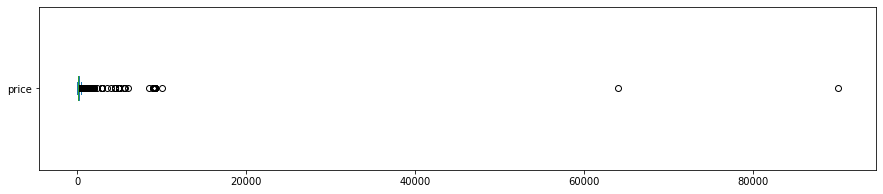

In [4]:
df.price.plot(kind='box',vert=False, figsize=(15,3))
# verifying amount of prices above 800 euros
limit_price = 800
print("price: values above {:d}".format(limit_price))
print("{} entries".format(len(df[df.price > limit_price])))
print("{:.4f}%".format((len(df[df.price > limit_price]) / df.shape[0])*100))

### Box-plot for minimum_nights


minimum_nights: values above
302 entries
1.7849%


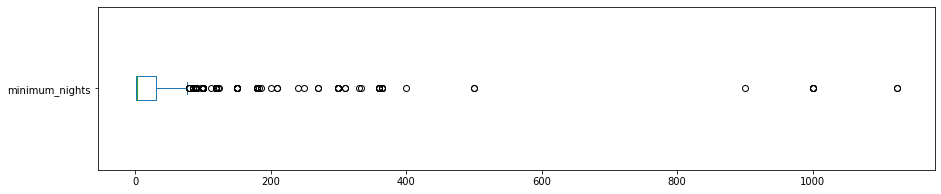

In [ ]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
# counting values above  30 for minimum_nights
print("\nminimum_nights: values above")
print("{} entries".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))

###Deleting outliers

In [6]:
# Checking possible cutoff values for outliers
#Approach #1: define outlier as values greater than limit given by formula  Q3 + 1.5*(Q3-Q1), where Q1 is the first quartile e Q3 is the third one.
upper_fence_price =  2.5* 191.0 - 1.5*50.0 #By expanding formula above we obtain  2.5*Q3 - 1.5*Q1
upper_fence_min_nights = 2.5*31 - 1.5
# Obtaining a percentage of lines whose 'price' and 'min_nights' values are greather than limits defined above
print("Price: values above {}", upper_fence_price)
print("{} entries".format(len(df[df.price > upper_fence_price])))
print("{:.4f}%".format((len(df[df.price > upper_fence_price]) / df.shape[0])*100))
print("\n")
print("Mininimum nigths: values above {}", upper_fence_min_nights)
print("{} entries".format(len(df[df.minimum_nights > upper_fence_min_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > upper_fence_min_nights]) / df.shape[0])*100))


Price: values above {} 402.5
731 entries
4.3203%


Mininimum nigths: values above {} 76.0
196 entries
1.1584%


Amount of filtered records: 420


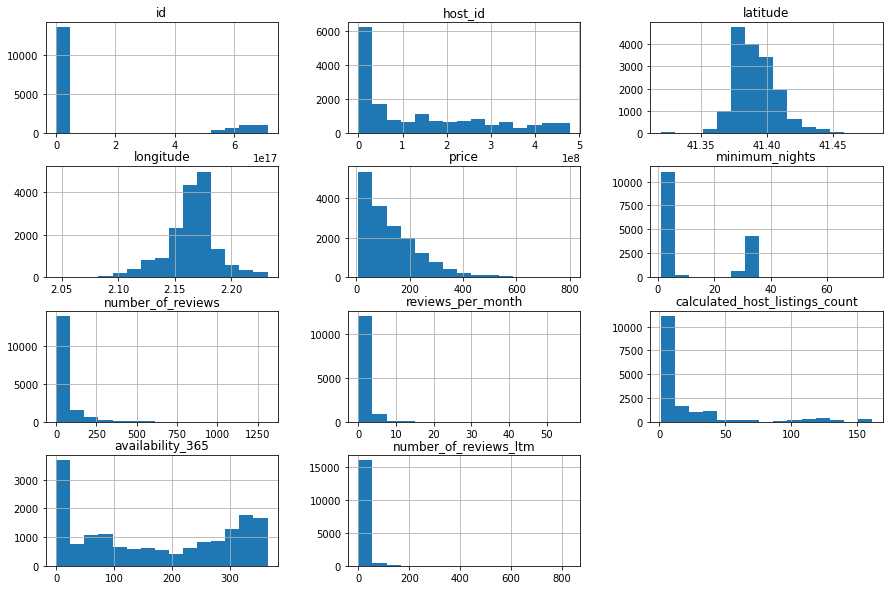

In [9]:
df_clean = df.copy()

#as there is a considerable amount of prices beyond upper limit by using formula from the descriptive statistics
#I've preferred filtering por values above 800 euros, which appears on aproximatedly 1% of the cases.
df_clean.drop(df_clean[df_clean.price > limit_price].index,axis=0,inplace=True)
#As for minimum nights, i've decided using the formula, for only a few listings are above 76 nights
df_clean.drop(df_clean[df_clean.minimum_nights > upper_fence_min_nights].index,axis=0,inplace=True)
#deleting listings with price = 0
df_clean.drop(df_clean[df_clean.price == 0.0].index,axis=0,inplace=True)
print("Amount of filtered records: {}".format(df.shape[0] - df_clean.shape[0]) )

# plot histogram for numerical fields
df_clean.hist(bins=15, figsize=(15,10));

## What is the correlation among the dataset fields?

In [ ]:
# creating a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
# displaying the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.327108,0.093998,0.059376,0.247896,0.257214
minimum_nights,-0.327108,1.000000,-0.181694,-0.216885,0.008790,0.057397
number_of_reviews,0.093998,-0.181694,1.000000,0.475447,-0.104969,0.054964
reviews_per_month,0.059376,-0.216885,0.475447,1.000000,-0.088210,0.141686
calculated_host_listings_count,0.247896,0.008790,-0.104969,-0.088210,1.000000,0.135332
availability_365,0.257214,0.057397,0.054964,0.141686,0.135332,1.000000


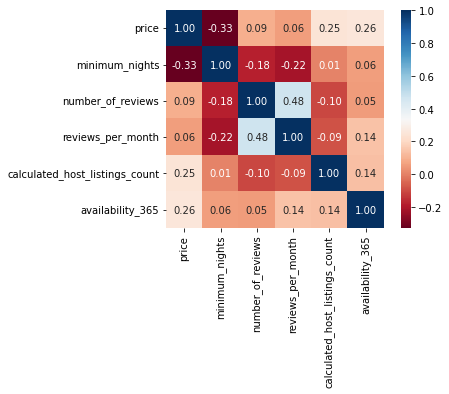

In [ ]:
# plot a heat map from these correlations
sns.heatmap(corr,cmap="RdBu",fmt=".2f",square=True,linecolor='white',annot=True)

In [8]:
#Weirdly, it seems that there isn't a correlation between price and minimum_nighs. Let's create a new field called 'price_per_night' which will be equals to 
# price / minimum_nights
df_clean["price_per_night"] = df["price"]/df["minimum_nights"]
df_clean[["name","neighbourhood_group","neighbourhood","price","minimum_nights","price_per_night"]].head(20)

,name,neighbourhood_group,neighbourhood,price,minimum_nights,price_per_night
0,Habitación muy acogedora.,Sants-Montjuïc,la Bordeta,59,1,59.000000
1,Cozy terrace apartment\nApartamento con patio,Les Corts,la Maternitat i Sant Ramon,110,3,36.666667
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Eixample,l'Antiga Esquerra de l'Eixample,386,4,96.500000
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Eixample,la Sagrada Família,245,2,122.500000
4,Huge flat for 8 people close to Sagrada Familia,Eixample,la Sagrada Família,180,1,180.000000
5,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,Sant Martí,el Besòs i el Maresme,230,5,46.000000
6,Apart. full equipped. 2 min to Subway lines L1...,Sants-Montjuïc,Sants - Badal,86,3,28.666667
7,Cozy Studio in Gracia Neighborhood,Gràcia,la Vila de Gràcia,31,31,1.000000
8,"8 lacus, VICTORIA",Sants-Montjuïc,Sants - Badal,110,2,55.000000
9,Sagrada Familia area - Còrsega 1,Gràcia,el Camp d'en Grassot i Gràcia Nova,140,2,70.000000


In [ ]:
# viewing a summary of the new created field
df_clean["price_per_night"].describe()

count    16500.000000
mean        74.132191
std        100.734760
min          0.200000
25%          3.343750
50%         37.666667
75%         98.333333
max        800.000000
Name: price_per_night, dtype: float64

In [ ]:
print("Percentage of listings with a minimum stay above 20 nights: {:.4f}".format(100*df_clean[df_clean["minimum_nights"] > 20].shape[0]/df_clean.shape[0]))
print("Percentage of listings with price per night below 10 euros: {:.4f}".format(100*df_clean[df_clean["price_per_night"] < 10.0].shape[0]/df_clean.shape[0]))

Percentage of listings with a minimum stay above 20 nights: 30.9939
Percentage of listings with price per night below 10 euros: 32.6121


As we can see, proportions of listings with long staying period and proportions of listings with very cheap price per night are very similar. Maybe it is a way of circumventing the law which restricts short-term rental of private rooms.

##Q7. What kind of property is the most rented on Airbnb?
The field *room_type* indicates the rental type advertised on Airbnb. If you've already rented a property on Airbnb, you know that it's possible to rent an entire home/apartment or only a private room or even share a room with other people.  
Let's count quantities of each property type available, by using method `value_counts()`:

In [ ]:
dRoomType =  df_clean.room_type.value_counts()
print(dRoomType)

Entire home/apt    9811
Private room       6344
Shared room         175
Hotel room          170
Name: room_type, dtype: int64


Text(0.5, 0, 'Quantity')

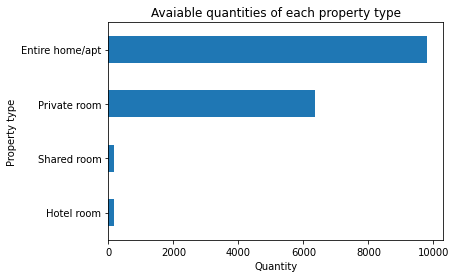

In [ ]:
#Showing distribuition graph of property types
dRoomType.sort_values().plot.barh()
plt.title("Avaiable quantities of each property type")
plt.ylabel("Property type")
plt.xlabel("Quantity")

In [ ]:
# show porcentages of each property type
df_clean.room_type.value_counts()*100/df_clean.shape[0]

Entire home/apt    59.460606
Private room       38.448485
Shared room         1.060606
Hotel room          1.030303
Name: room_type, dtype: float64

In [ ]:
#Now, we will check if there is private rooms with short-term rentals, which is forbid by Barcelona government
df_clean[(df_clean.room_type == "Private room") &  (df_clean.minimum_nights <7)].shape[0]

4280

In [ ]:
df_clean[(df_clean.room_type == "Private room") &  (df_clean.minimum_nights <7)].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_per_night
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt,59.000000
26,214970,Single Cozy Room in central flat Barcelona,1110014,Janeth,Sants-Montjuïc,el Poble Sec,41.370420,2.164110,Private room,19,5,152,2022-08-23,1.22,1,270,8,NaN,3.800000
28,709162172220879194,Bedroom in a sun-filled duplex w/ terrace,171499055,Amélie,Les Corts,la Maternitat i Sant Ramon,41.369667,2.114618,Private room,36,2,0,NaN,NaN,1,340,0,Exempt,18.000000
63,32250269,Suite en casa privada con piscina en San Justo.,242046364,Gabriel,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",41.387790,2.078410,Private room,100,2,58,2022-08-29,1.45,2,9,20,Exempt,50.000000
83,32253124,Explore Barcelona From Suite in a Brilliant Po...,242046364,Gabriel,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",41.387970,2.078910,Private room,100,2,56,2022-09-06,1.31,2,19,22,Exempt,50.000000
88,680292816789688100,Habitación cerca del aeropuerto y del centro,471841596,Jesus,Sants-Montjuïc,la Marina de Port,41.359796,2.125766,Private room,33,1,10,2022-09-04,6.98,2,318,10,Exempt,33.000000
95,128463,Private Suite in residential area!!,635253,Sebastian,Sants-Montjuïc,Sants,41.371550,2.136640,Private room,61,3,334,2022-09-06,2.49,1,323,43,HUTB-012603,20.333333
104,36880106,"Privat room, near airport,two stops in Barcelona",277140770,Tekle,Sants-Montjuïc,la Bordeta,41.363420,2.127280,Private room,43,3,104,2022-09-08,2.72,1,3,58,Exempt,14.333333
121,153376,Single room. central and quite,737399,Omar,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386150,2.176360,Private room,67,3,20,2022-09-04,0.50,1,0,13,NaN,22.333333
146,323854,Casa Sagrada Familia Bcn Doubleroom,1657312,Alberto,Eixample,la Sagrada Família,41.408430,2.174940,Private room,30,1,21,2014-07-29,0.16,1,0,0,NaN,30.000000


There is about 4230 listings satisfying conditions above, many of them with recent reviews, which indicates that they're still available for renting.

##Q8. Which is the most expensive location in the dataset?
###Listing districts of Barcelona
Before showing the most expensive location let's see a table with the 10 districts of Barcelona and their neighbourhoods.

<img src="https://github.com/marciusdm/dsnp/blob/main/assets/projeto1/BairrosBarcelona.png?raw=true" alt="Districts of Barcelona"/>


In [ ]:
# seeing prices by neighbourhood, on average
group_neighbour = df_clean.groupby(["neighbourhood"])
group_neighbour_gp = df_clean.groupby(["neighbourhood_group","neighbourhood"])
group_neighbour_gp.price.mean().sort_values(ascending=False)[:15]

neighbourhood_group  neighbourhood                               
Eixample             la Dreta de l'Eixample                          202.054767
Sant Martí           Diagonal Mar i el Front Marítim del Poblenou    200.736434
                     la Vila Olímpica del Poblenou                   189.219858
Eixample             l'Antiga Esquerra de l'Eixample                 162.666269
                     Sant Antoni                                     155.557398
                     la Sagrada Família                              147.574761
Sarrià-Sant Gervasi  Sant Gervasi - Galvany                          147.487179
Eixample             el Fort Pienc                                   146.080899
Horta-Guinardó       Sant Genís dels Agudells                        144.428571
Sant Martí           el Poblenou                                     140.150418
                     el Parc i la Llacuna del Poblenou               139.029586
Sants-Montjuïc       Hostafrancs                      

Viewing a diagram of the most expensives neighbourhoods of Barcelona:

Text(0, 0.5, 'Neighbourhood')

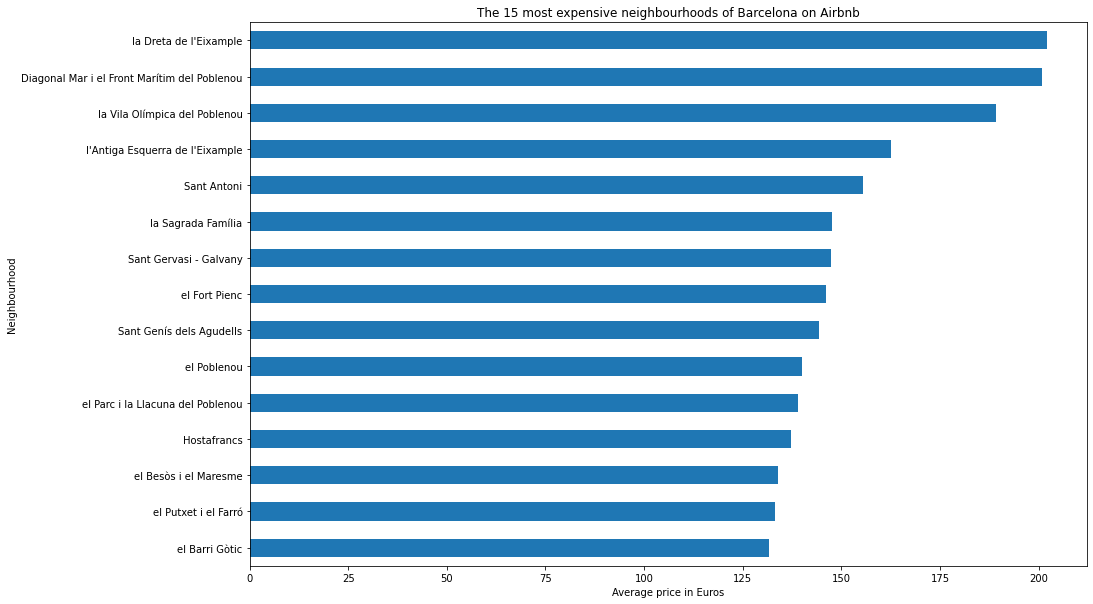

In [ ]:
df_group_neighbour =  group_neighbour.price.mean().sort_values(ascending=False)[:15]
df_group_neighbour.sort_values().plot.barh( figsize=(15,10))
plt.title("The 15 most expensive neighbourhoods of Barcelona on Airbnb")
plt.xlabel("Average price in Euros")
plt.ylabel("Neighbourhood")

In [ ]:
#examinating the 15 neighbourhoods with the most expensive prices by night
group_neighbour_gp.price_per_night.mean().sort_values(ascending=False)[:15]

neighbourhood_group  neighbourhood                               
Sant Martí           Diagonal Mar i el Front Marítim del Poblenou    130.877559
Eixample             la Dreta de l'Eixample                          125.645351
Sant Martí           la Vila Olímpica del Poblenou                   102.348301
Eixample             l'Antiga Esquerra de l'Eixample                 101.877041
                     Sant Antoni                                      87.591708
Sarrià-Sant Gervasi  Sant Gervasi - Galvany                           83.462218
Eixample             la Sagrada Família                               81.846638
Sants-Montjuïc       Hostafrancs                                      81.186914
Sant Martí           el Besòs i el Maresme                            79.751455
Sants-Montjuïc       la Bordeta                                       77.190050
Les Corts            les Corts                                        77.014537
Sarrià-Sant Gervasi  les Tres Torres                  

In [ ]:
#examinating the 15 neighbourhoods with the highest offer of rentals 
group_neighbour_ng_count =  group_neighbour_gp.price.count().sort_values(ascending=False)[:15]
print(group_neighbour_ng_count)

neighbourhood_group  neighbourhood                        
Eixample             la Dreta de l'Eixample                   1972
Ciutat Vella         el Raval                                 1176
                     el Barri Gòtic                           1025
Eixample             la Sagrada Família                        943
Gràcia               la Vila de Gràcia                         940
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera     909
Eixample             l'Antiga Esquerra de l'Eixample           839
                     Sant Antoni                               784
Sants-Montjuïc       el Poble Sec                              752
Eixample             la Nova Esquerra de l'Eixample            577
Les Corts            la Maternitat i Sant Ramon                506
Eixample             el Fort Pienc                             445
Sants-Montjuïc       Sants - Badal                             377
Sant Martí           el Poblenou                               359
Ciu

Now we will plot a diagram with the 15 neighbourhoods with the highest offer of rentals on Airbnb

Text(0, 0.5, 'Neighbourhood')

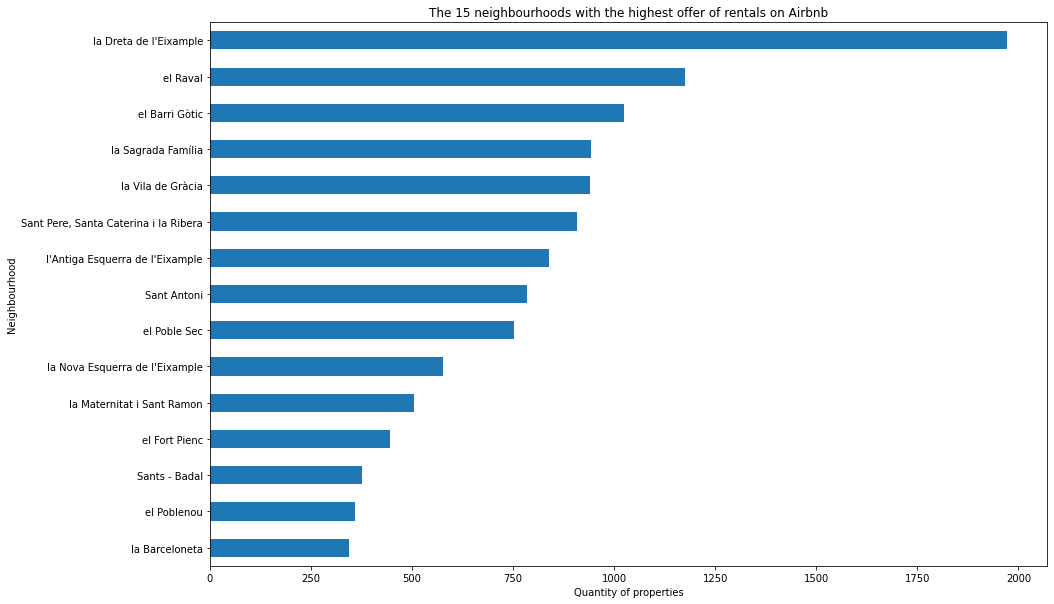

In [ ]:
group_neighbour_count = group_neighbour.price.count().sort_values(ascending=False)[:15]
group_neighbour_count.sort_values().plot.barh( figsize=(15,10))
plt.title("The 15 neighbourhoods with the highest offer of rentals on Airbnb")
plt.xlabel("Quantity of properties")
plt.ylabel("Neighbourhood")

Checking if there is a correlation between prices and offering of rentals:

In [ ]:
df2 = pd.DataFrame()
df2["mean"] = group_neighbour.price.mean()
df2["mean_pn"] = group_neighbour.price_per_night.mean()
df2["count"] = group_neighbour.price.count()
#df2.head(30)
cor = df2.corr()
display(cor)

,mean,mean_pn,count
mean,1.000000,0.897302,0.572280
mean_pn,0.897302,1.000000,0.574808
count,0.572280,0.574808,1.000000


As we can notice, there is a strong correlation betweeen prices and prices_per_night, but only a moderate correlation between prices and offer of rentals.

##Plotting a diagram of latitude x longitude
Before plotting this diagram, let's show a map o Barcelona, with its districts:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Barcelona_districtes.svg/800px-Barcelona_districtes.svg.png?20080114211938" alt="Districts of Barcelona">

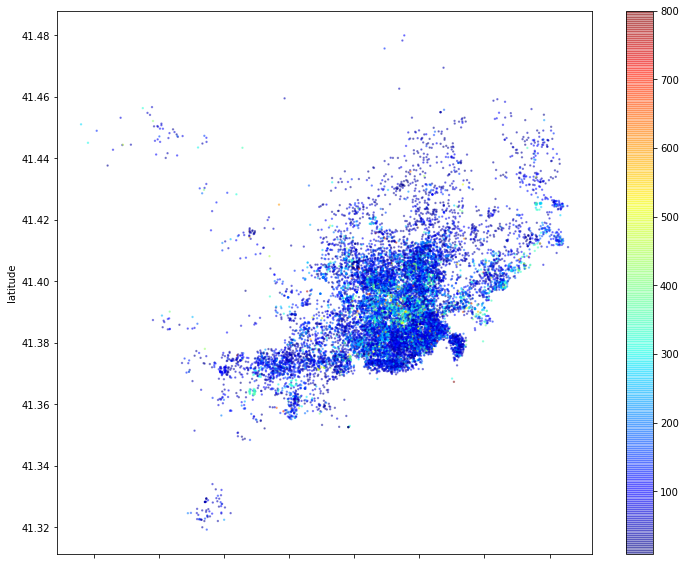

In [ ]:
#Plotting listings by coordinates
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=2,
              cmap=plt.get_cmap('jet'), figsize=(12,10));

##Q9. After removal of outliers, what is the averages of minimum of nights for renting (minimum_nights), of price and of price_per_night?


In [ ]:
# viewing average of `minimum_nigths`
print("Average of minimum of nights: {:.2f}".format(df_clean.minimum_nights.mean()))
#viewing average of 'price'
print("Average of price: {:.2f}".format(df_clean.price.mean()))
#viewing average of 'price_per_night'
print("Average of price per night: {:.2f}".format(df_clean.price_per_night.mean()))

Average of minimum of nights: 11.44
Average of price: 135.20
Average of price per night: 74.13


## Conclusions
After a brief analysis it was possible to detect outliers on several fields, specially on *price* and *minimum_nights*, on which it was given a major focus.  
The relationship between prices and quantity of rentals was also studied and it was found that there is no strong correlation between both variables, so much so that the list of locations with the most expensive properties differs reasonably from the list of locations with the highest number of properties on offer.  
Also, a brief analysis of the impact of the local law that restricts the short-term rental of private rooms was made and it was found that there are still offers of these on Airbnb. In addition, the presence of listings with long-term rentals was detected with ridiculously low prices per night, which proves to be a way of circumventing the law.  
A quick research on Wikipedia allowed to conclude that districts with most expensive rentals on average  ([Eixample](https://en.wikipedia.org/wiki/Eixample) and [Sant Martí](https://en.wikipedia.org/wiki/Sant_Mart%C3%AD_(district)))) are the ones with the greatest population, and with a great number of touristic attractions.

